# Nulls and Cleaning

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression

### Dictionary link : http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In [3]:
#The train dataset has all of the columns that you will need 
#to generate and refine your models. The test dataset has all of those 
#columns except for the target that you are trying to predict in your Regression model.
df_train = pd.read_csv('../Data/train.csv')
df_test = pd.read_csv('../Data/test.csv')

### We are looking at distribution of null values in these next few code blocks

Null matrix showing where the null values are in our data:

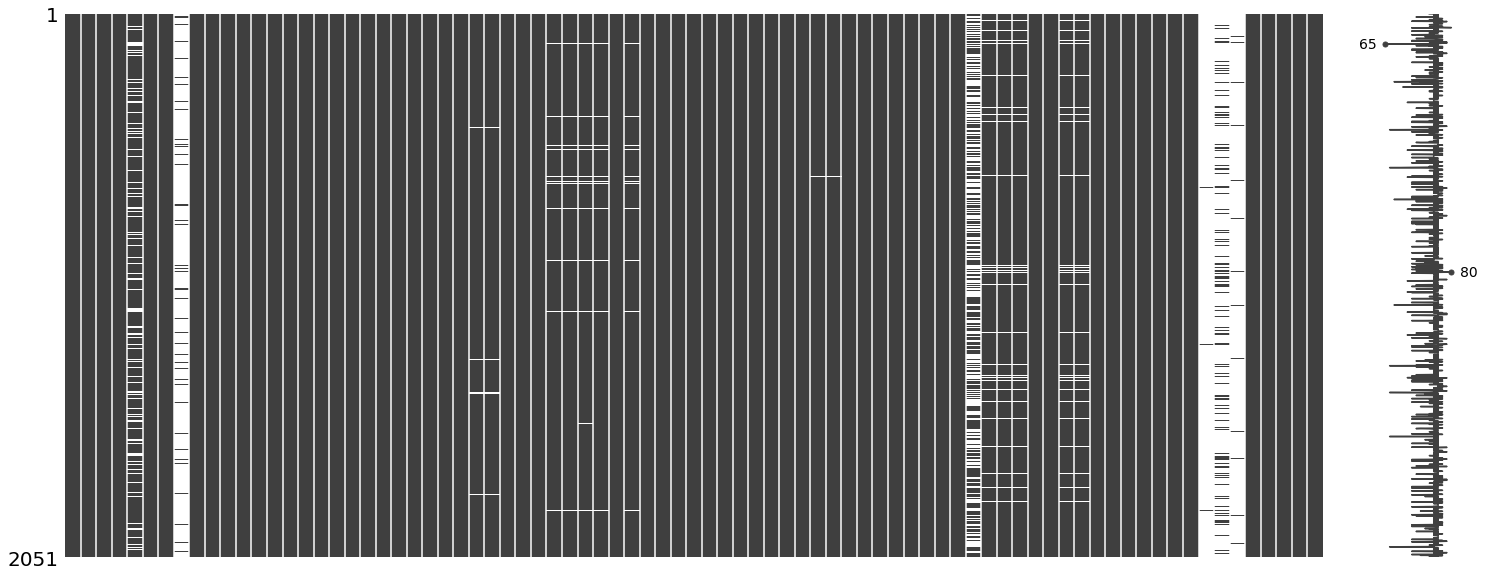

In [4]:
msno.matrix(df_train);

A bar chart showing the frequency of nulls according to each column:

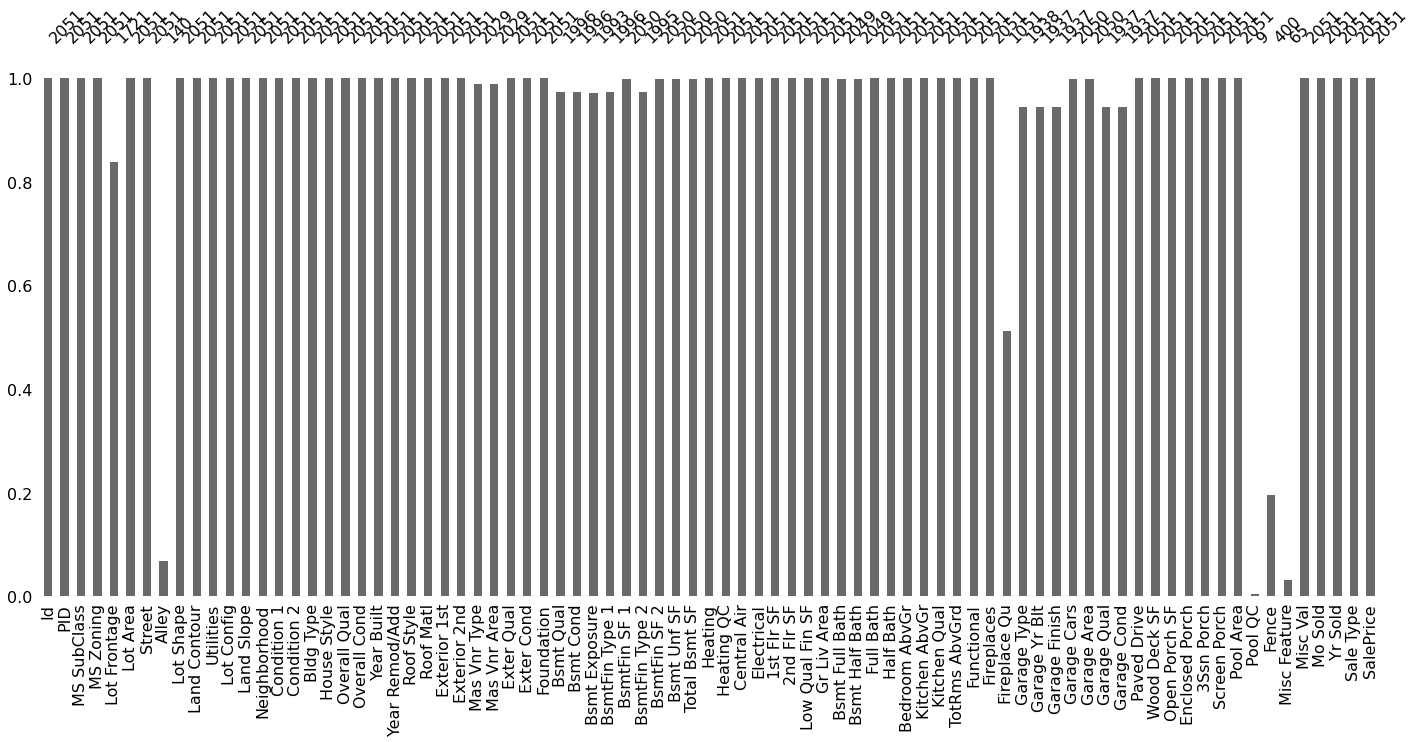

In [5]:
msno.bar(df_train);

Above we can see the columns with null values visually represented: **Lot Frontage**, **Alley**, **Mas Vnr Type**, **Mas Vnr Area**, **Bsmt Qual**, **Bsmt Cond**, **Bsmt Exposure**, **BsmtFin Type 1**, **BsmtFin Type 2**, **Fireplace Qu**, **Garage Type**, **Garage Yr Blt**, **Garage Finish**, **Garage Qual**, **Garage Cond**, **Pool QC**, **Fence**, **Misc Feature**.

Below, we will see the nulls relationship with each other using a dendrogram, as I am curious to how often one missing variable relates to the other!

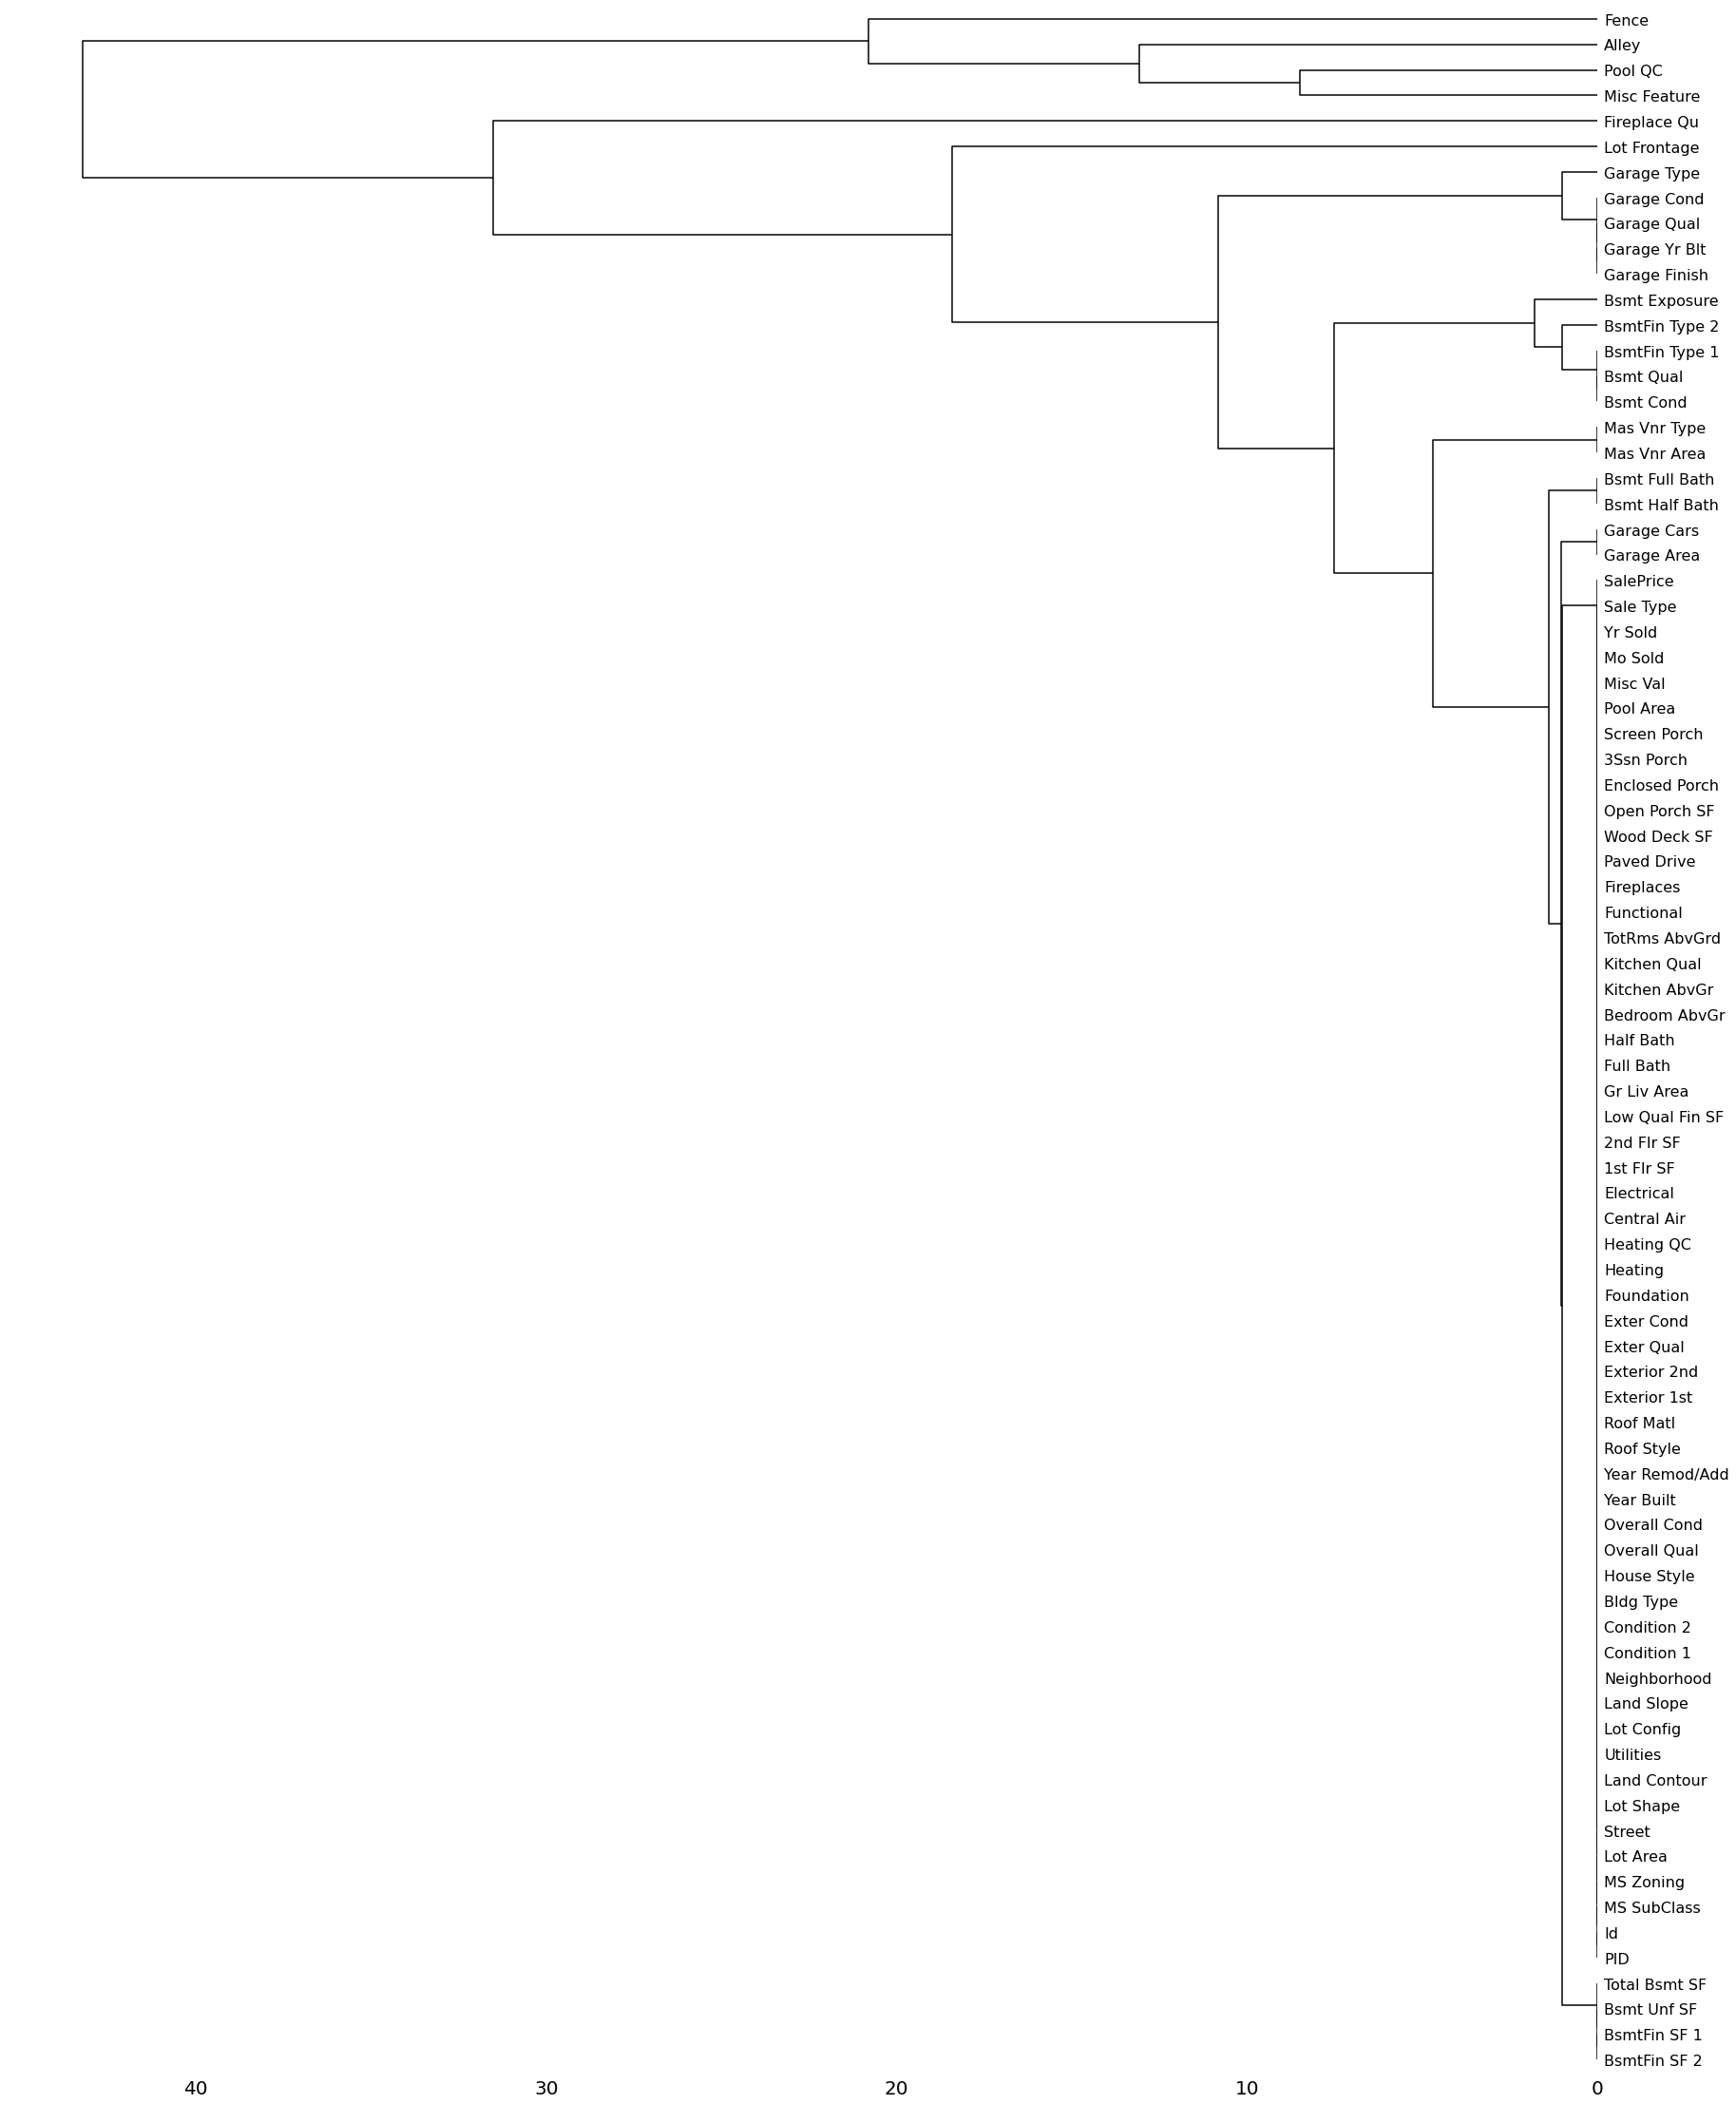

In [6]:
mat = msno.dendrogram(df_train, figsize = (30, 40));

The range of this meatmap is 1 to -1. 1 meaning a high correlation to the values both appearing, and -1 meaning if one value appears, the other definately does not.

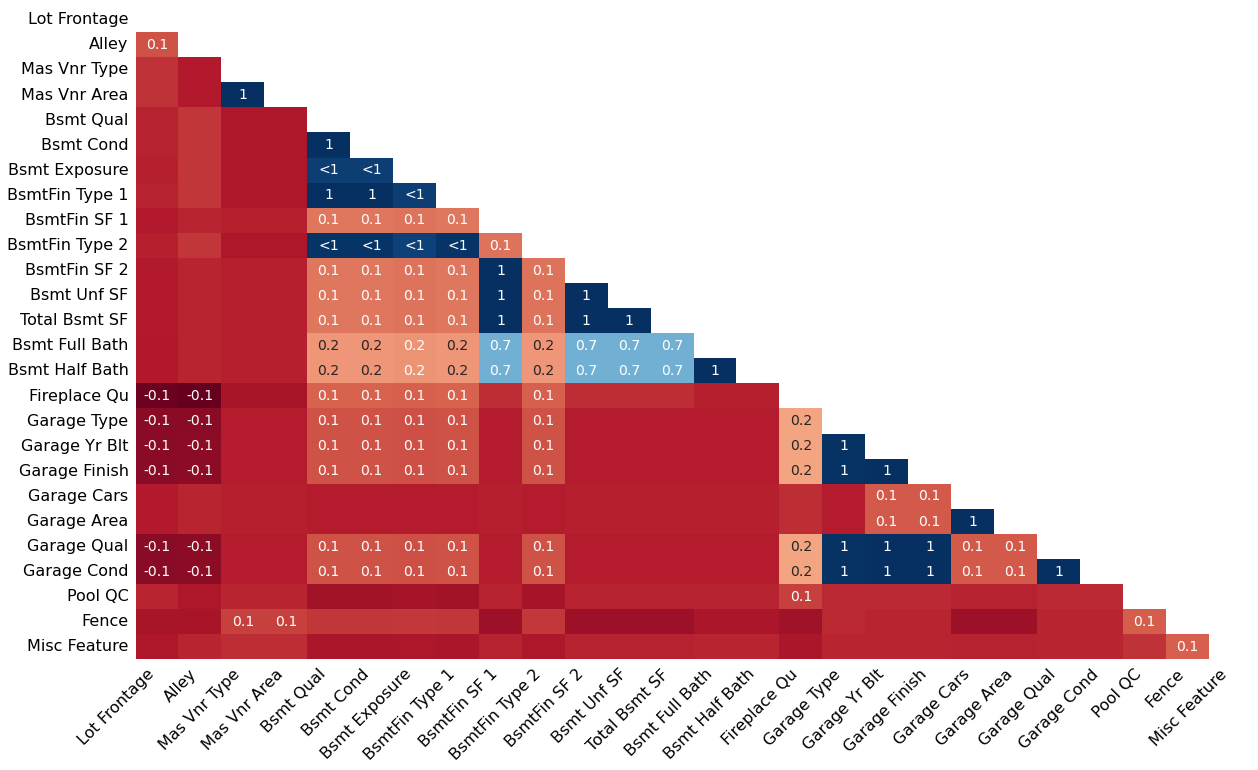

In [7]:
msno.heatmap(df_train);

Next we will identify what missing values may mean in a column or feature.

Lot Frontage (Continuous): Linear feet of street connected to property
There are a lot of nulls here because lot frontage is only valued or counted based on every front foot beyond the zone minimum. It is connected with the property's development potential.
source: https://avitarassociates.com/Portals/0/PDF/UnderstandingYourPropertyRecordCard.pdf

In [8]:
#df_train['Lot Frontage'].replace([np.nan, 0], inplace = True)

In [9]:
#df_train['Lot Frontage'].fillna(0, inplace = True)

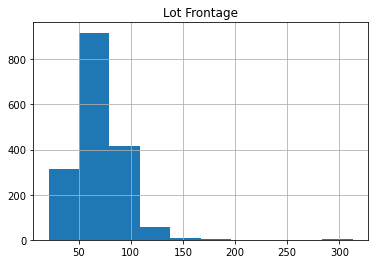

In [10]:
df_train[['Lot Frontage']].hist();

In [11]:
df_train['Alley'].isnull().sum()

1911

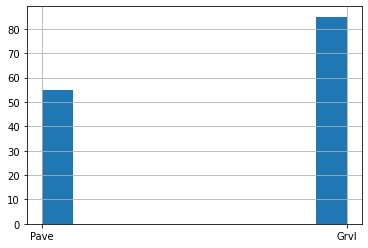

In [12]:
df_train['Alley'].hist();

There are a lot of null's in alley, because NA means no alley access! So we will change that column value now.

In [13]:
#df_train['Alley'].fillna('No alley access', inplace = True)

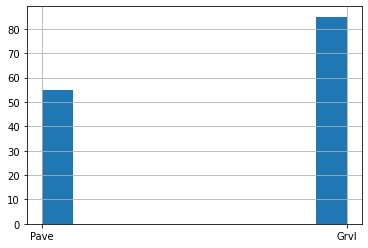

In [14]:
df_train['Alley'].hist();

In [15]:
#df_train['Mas Vnr Type'].fillna('None', inplace = True)

In [16]:
#df_train['Mas Vnr Area'].fillna(0, inplace = True)

**Bsmt Exposure**, **BsmtFin Type 1**, **BsmtFin Type 2**, **Fireplace Qu**, **Garage Type**, **Garage Yr Blt**, **Garage Finish**, **Garage Qual**, **Garage Cond**, **Pool QC**, **Fence**, **Misc Feature**

The Basement quality would be null because there is no basement.

In [17]:
#df_train['Bsmt Qual'].fillna('No Basement', inplace = True)

In [18]:
#df_train['Bsmt Cond'].fillna('No Basement', inplace = True)

In [19]:
#why are there 58 na rows here, and only 55 missing in basment cond and basement qual? run merge bt two to see
#if there is any rows where basement cond = no basement but basement exposure is equal to a different value than null

In [36]:
comparison_column = np.where(df_train['Bsmt Qual'] == df_train['Bsmt Cond'], True, False)
print(comparison_column)

[ True False  True ...  True  True  True]
